# Klasse E  Versterkers

De presentatie slides van dit hoofdstuk kan je <a href="./slides/Klasse-E.slides.html">`hier`</a> vinden.

In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from  matplotlib import patches
import scipy.signal as signal
import numpy as np
from PySpice.Probe.Plot import plot
from PySpice.Spice.Parser import SpiceParser
from PySpice.Spice.Netlist import Circuit
from PySpice.Unit import *
import schemdraw as schem
import schemdraw.elements as e
from ipywidgets import interact,FloatSlider
usewidgets=True;
def spicelisting(filename):
    with open(filename) as f:
        for line in f:
            print(line.strip())
    print()

In de vorige hoofdstukken hebben we de C en F versterkers besproken. Dit zijn hoogfrequent versterkers met 1 vermogen transistor in de vermogentrap. 

In dit hoofdstuk bestuderen we de klasse E versterker. Beide versterkers zijn resonante versterkers die bestaat uit een LRC trilkring (of meerdere LC kringen) die aangestuurd wordt door een enkele transistor. Als een gevolg hiervan werkt deze versterker op een vaste frequentie of binnen een zeer beperkte bandbreedte rond deze centrale frequentie. Deze bandbreedte is typisch maximaal 1%  van de resonantie frequentie.
In Tabel 1 geven we een overzicht van deze verschillende versterkers.

|   | laagfrequent of breedband  | hoogfrequent of resonant|
|:--| :-- | :-- |
|1 transistor <BR> in de vermogentrap  |Klasse A      |Klasse C <BR> Klasse F <BR>**Klasse E**|
|2 of meer  transistors <BR>in de vermogentrap |  Klasse B  <BR> Klasse G| Klasse D  |
    


<p class=tabcaption> Indeling van de vermogenversterkers</p>

## Initiele Klasse E versterker

De klasse E versterkers zijn initieel uitgewerkt door Sokal and Sokal <cite id="75ii2"><a href="#zotero|1031761/96BMKR88">[1]</a></cite><cite id="p24ri"><a href="#zotero|1031761/CXUZ8ZFG">[2]</a></cite><cite id="9qfqr"><a href="#zotero|1031761/G2K7PIUF">[3]</a></cite>

### Stap voor stap opbouw van de werking

#### Serie resonante kring

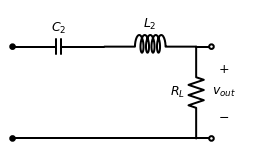

In [143]:
d = schem.Drawing()
d.add(e.DOT)
C2 = d.add(e.CAP, d='right', label='$C_2$')
L2 = d.add(e.INDUCTOR2, d='right', label='$L_2$')
R = d.add(e.RES, d='down', label='$R_L$')
d.add(e.LINE, xy=R.start, d='right', l=0.5)
dot=d.add(e.DOT_OPEN)
d.add(e.LINE,xy=R.end, d='right',l=0.5)
d.add(e.DOT_OPEN)
d.add(e.LINE,xy=R.end, d='left', tox=C2.start)
d.add(e.DOT)
d.add(e.GAP_LABEL, d='down', xy= dot.start, toy= R.end, label=['+','$v_{out}$','$-$'],lblofst=0.4)
d.draw()

```{figure} ./images/mpl.svg
---
name: efig1
---
 Resonante seriekring van de klasse E versterker
 ```

#### Stroom in de serie resonante kring (1)

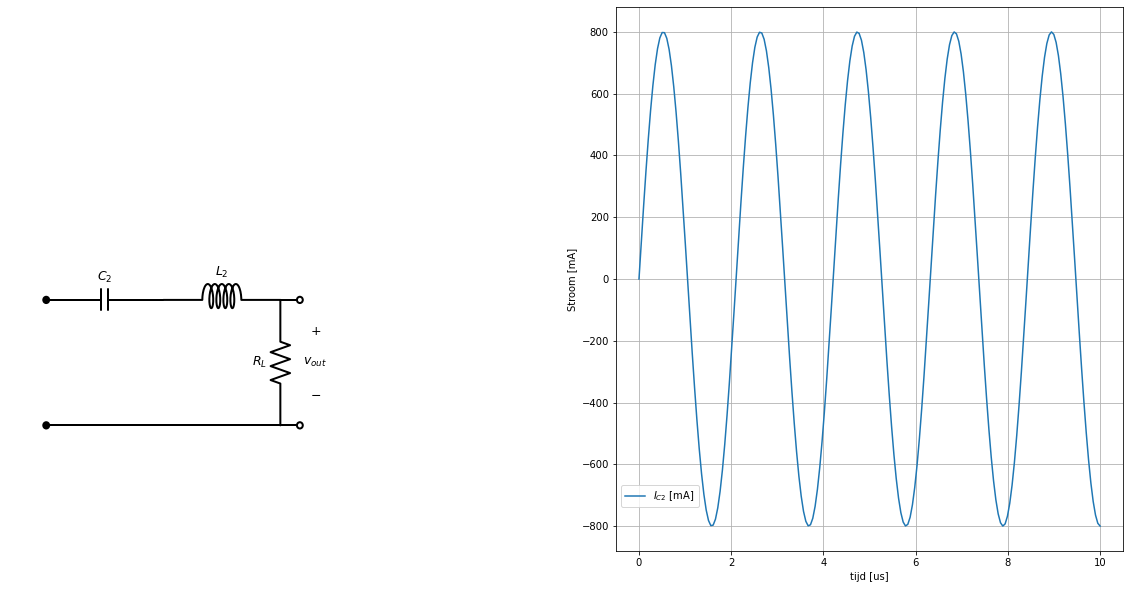

In [144]:
figure, ax = plt.subplots(1,2,figsize=(20, 10))
d.draw(ax=ax[0])
ax[0].set_xlim(-1,12)
ax[0].set_ylim(-6,7)
ax[0].set_axis_off()
time=np.linspace(0,1e-5,200)
iC2L2=800*np.sin(475000*np.pi*2*time)
ax[1].plot(time*1e6,iC2L2,label='$I_{C2}$ [mA] ')
ax[1].legend( loc=(0.01,.08))
ax[1].grid()
ax[1].set_xlabel('tijd [us]')
ax[1].set_ylabel('Stroom [mA]');


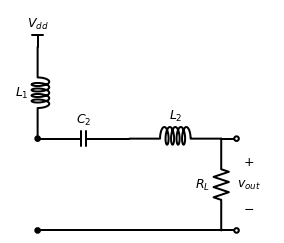

In [145]:
d = schem.Drawing()
d.add(e.VDD, label='$V_{dd}$')
L1 = d.add(e.INDUCTOR2, d='down', label='$L_1$')
d.add(e.DOT)
C2 = d.add(e.CAP, d='right', label='$C_2$')
L2 = d.add(e.INDUCTOR2, d='right', label='$L_2$')
R = d.add(e.RES, d='down', label='$R_L$')
d.add(e.LINE, xy=R.start, d='right', l=0.5)
dot=d.add(e.DOT_OPEN)
d.add(e.LINE,xy=R.end, d='right',l=0.5)
d.add(e.DOT_OPEN)
d.add(e.LINE,xy=R.end, d='left', tox=C2.start)
d.add(e.DOT)
d.add(e.GAP_LABEL, d='down', xy= dot.start, toy= R.end, label=['+','$v_{out}$','$-$'],lblofst=0.4)
d.draw()

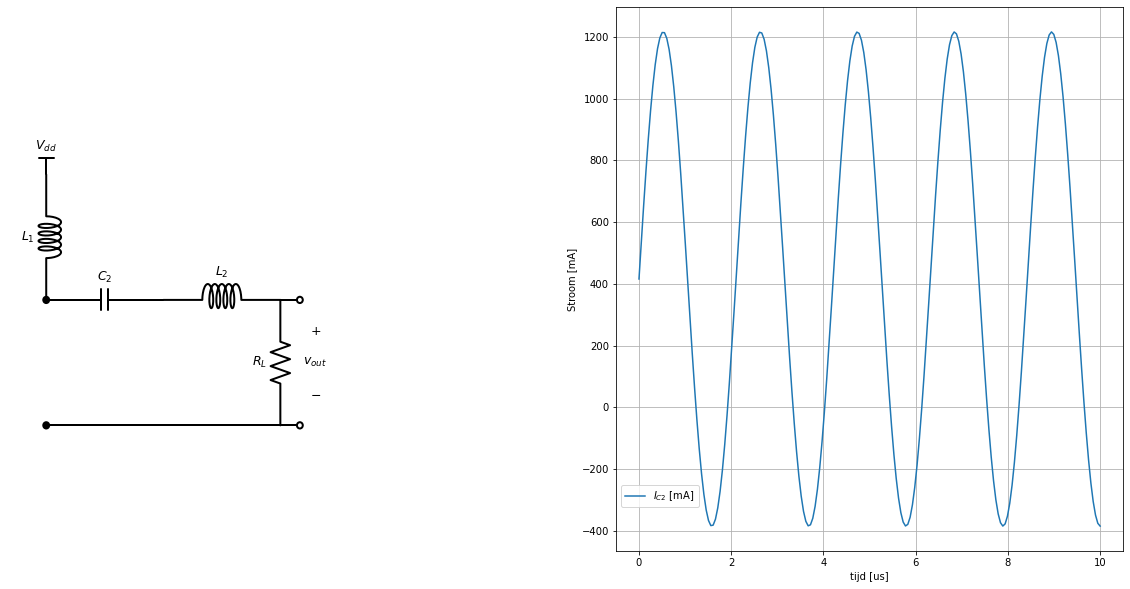

In [146]:
figure, ax = plt.subplots(1,2,figsize=(20, 10))
d.draw(ax=ax[0])
ax[0].set_xlim(-1,12)
ax[0].set_ylim(-9,4)
ax[0].set_axis_off()
time=np.linspace(0,1e-5,200)
iC2L2=1800*np.sin(475000*np.pi*2*time)+416
ax[1].plot(time*1e6,iC2L2,label='$I_{C2}$ [mA] ')
ax[1].legend( loc=(0.01,.08))
ax[1].grid()
ax[1].set_xlabel('tijd [us]')
ax[1].set_ylabel('Stroom [mA]');

### Integratie op een condensator $C_1$

De spanning die bekomen wordt ten gevolge van de integratie op een condensator is:

$$v=\frac{1}{C_1}\int_0^t i(t) dt $$

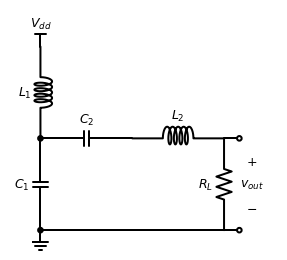

In [147]:
d = schem.Drawing()
d.add(e.VDD, label='$V_{dd}$')
L1 = d.add(e.INDUCTOR2, d='down', label='$L_1$')
d.add(e.DOT)
C2 = d.add(e.CAP, d='right', label='$C_2$')
L2 = d.add(e.INDUCTOR2, d='right', label='$L_2$')
R = d.add(e.RES, d='down', label='$R_L$')
d.add(e.LINE, xy=R.start, d='right', l=0.5)
dot=d.add(e.DOT_OPEN)
d.add(e.LINE,xy=R.end, d='right',l=0.5)
d.add(e.DOT_OPEN)
d.add(e.LINE,xy=R.end, d='left', tox=C2.start)
d.add(e.DOT)
d.add(e.GAP_LABEL, d='down', xy= dot.start, toy= R.end, label=['+','$v_{out}$','$-$'],lblofst=0.4)
C1 = d.add(e.CAP, d='down',xy=L1.end,toy=R.end, label='$C_1$')
d.add(e.GND)
d.draw()

### Integratie van de stoom op een condensator van 4.7nF 

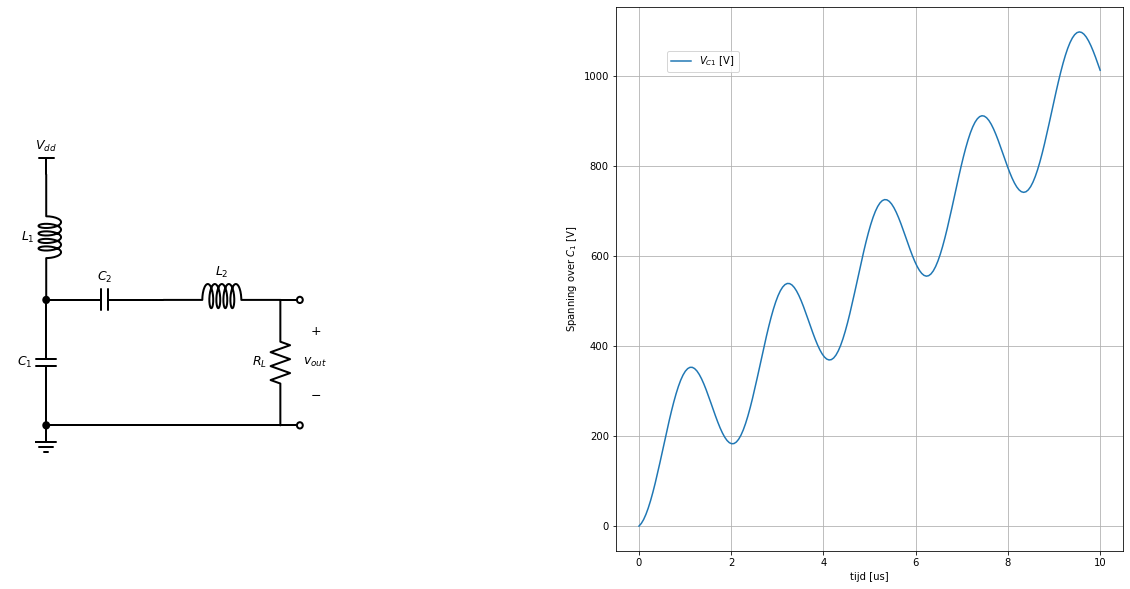

In [153]:
figure, ax = plt.subplots(1,2,figsize=(20, 10))
d.draw(ax=ax[0])
ax[0].set_xlim(-1,12)
ax[0].set_ylim(-9,4)
ax[0].set_axis_off()
time=np.linspace(0,1e-5,200)
vc1=1/4.7e-9*(-1800*(np.cos(475000*np.pi*2*time)-1)/(475000*np.pi*2)+416*time)/1000
ax[1].plot(time*1e6,vc1,label='$V_{C1}$ [V] ')
ax[1].legend( loc=(0.1,.88))
ax[1].grid()
ax[1].set_xlabel('tijd [us]')
ax[1].set_ylabel('Spanning over $C_1$ [V]');

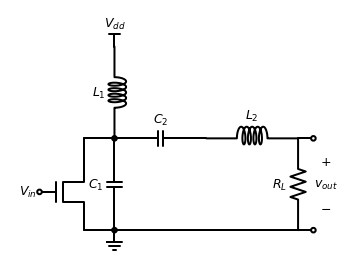

In [49]:
d = schem.Drawing()
d.add(e.VDD, label='$V_{dd}$')
L1 = d.add(e.INDUCTOR2, d='down', label='$L_1$')
d.add(e.DOT)
C2 = d.add(e.CAP, d='right', label='$C_2$')
L2 = d.add(e.INDUCTOR2, d='right', label='$L_2$')
R = d.add(e.RES, d='down', label='$R_L$')
d.add(e.LINE, xy=R.start, d='right', l=0.5)
dot=d.add(e.DOT_OPEN)
d.add(e.LINE,xy=R.end, d='right',l=0.5)
d.add(e.DOT_OPEN)
d.add(e.LINE,xy=R.end, d='left', tox=C2.start)
d.add(e.DOT)
d.add(e.GAP_LABEL, d='down', xy= dot.start, toy= R.end, label=['+','$v_{out}$','$-$'],lblofst=0.4)
C1 = d.add(e.CAP, d='down',xy=L1.end,toy=R.end, label='$C_1$')
d.add(e.GND)
d.add(e.LINE, d='left', l=1)
d.add(e.LINE, d='up', l=0.5)
T = d.add(e.NFET, d='left', lftlabel='$V_{in}$')
d.add(e.LINE, d='up',toy=R.start)
d.add(e.LINE,tox=L1.end, d='right')
d.add(e.DOT_OPEN, xy=T.gate)
d.draw()

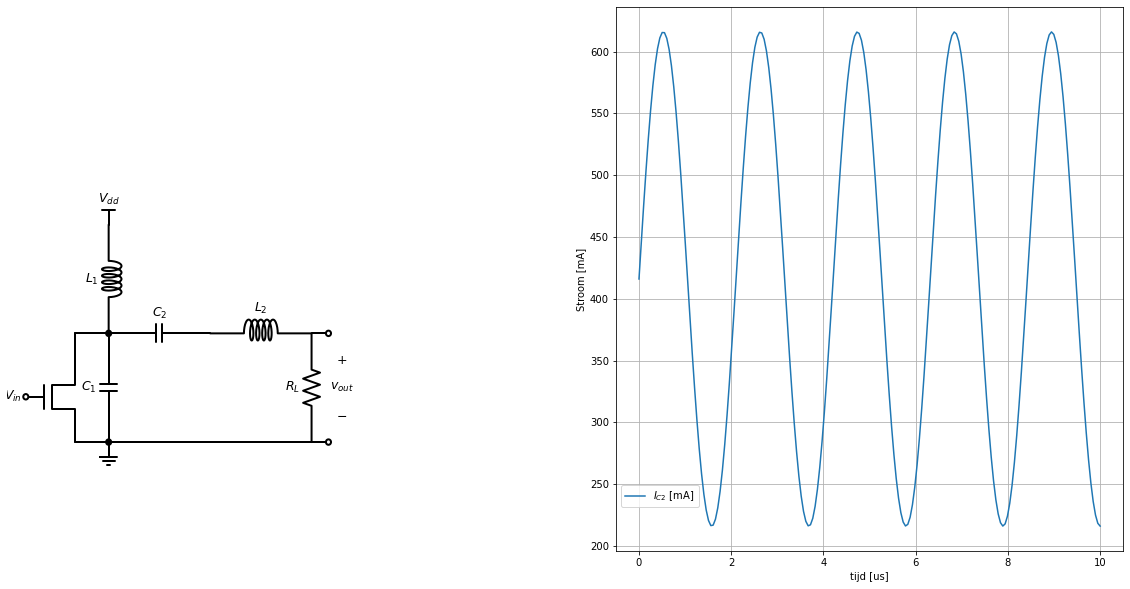

In [51]:
figure, ax = plt.subplots(1,2,figsize=(20, 10))
d.draw(ax=ax[0])
ax[0].set_xlim(-3,12)
ax[0].set_ylim(-9,6)
ax[0].set_axis_off()
time=np.linspace(0,1e-5,200)
iC2L2=200*np.sin(475000*np.pi*2*time)+416
ax[1].plot(time*1e6,iC2L2,label='$I_{C2}$ [mA] ')
ax[1].legend( loc=(0.01,.08))
ax[1].grid()
ax[1].set_xlabel('tijd [us]')
ax[1].set_ylabel('Stroom [mA]');

## Ontwerpen van enkele voorbeelden

Voor het ontwerpen van een aantal voorbeelden nemen we de vergelijkingen vanuit <cite id="9qfqr"><a href="#zotero|1031761/G2K7PIUF">[3]</a></cite>


$$R_L= 0.576801 \frac{(V_{DD}-V_{sat})^2}{P} \left(1.0000086-\frac{0.414396}{Q}-\frac{0.577501}{Q^2}+\frac{0.205967}{Q^3}   \right) $$

$$C_1= \frac{1 }{5.4466 \omega R_L} \left(0.99866+\frac{0.91424}{Q}-\frac{1.03175}{Q^2}\right)+\frac{0.6}{\omega^2 L_1} $$

$$C_2= \frac{1 }{\omega R_L} \left( \frac{1 }{Q-0.104823} \right)\left(1.00121+\frac{1.01468 }{Q-1.7879} \right)-\frac{0.2}{\omega^2 L_1} $$

$$L_2=\frac{Q R_L}{\omega} $$


met $\omega=2 \pi f$

### een 475 kHz versterker

We ontwerpen een klasse E versterker die een vermogen van 5W moet kunnen leveren bij een frequentie van 475 kHz, bij een voedingsspanning van 12.5V, met een Q factor van 5 en een saturatiespanning van de bipolaire transistor van 0.5 V. 

In [36]:
def ClassECalc(Q=5, Vcc=12.5, Vo=0.5, f=475000,L1=0.001, P=5, verbose=False, plot=True,TransformerCoax=False):
    
    R=0.576801*((Vcc-Vo)*(Vcc-Vo)/P)*(1.0000086-(0.414396/Q)-(0.577501/(Q*Q))+(0.205967/(Q*Q*Q)));
    C1=(1/(34.2219*f*R))*(0.99866+(0.91424/Q)-(1.03175/(Q*Q)))+0.6/((2*np.pi*f)*(2*np.pi*f)*L1);
    XC1=-1/(2*np.pi*f*C1);
    C2=(1/(2*np.pi*f*R))*(1/(Q-0.104823))*(1.00121+1.01468/(Q-1.7879))-0.2/(2*np.pi*f*2*np.pi*f*L1);
    XC2=-1/(2*np.pi*f*C2);
    L2=Q*R/(2*np.pi*f);
    XL2=2*np.pi*f*L2;
    Icc = P/(Vcc-Vo);
    Vds = Vcc*3.56/0.8;
    tr = np.sqrt(50.0/R)
    DX=XL2+XC2
    if verbose:
        print("R{} = {:.2f} Ohm".format('L', R))
        print("C\u2081 = {:.2f} nF, wat overeenkomt met een complexe impedantie van {:.2f} i Ohm".format(C1*1000000000, XC1))
        print("C\u2082 = {:.2f} nF, wat overeenkomt met een complexe impedantie van {:.2f} i Ohm".format( C2*1000000000, XC2))
        print("L\u2082 = {:.2f} uH, wat overeenkomt met een complexe impedantie van {:.2f} i Ohm".format( L2*1000000, XL2))
        print("De totale complexe impedantie van de seriekring is {:.2f} i Ohm".format(DX))
        print("De maximale stroom uit de voeding is {:.2f} mA".format(Icc*1000))
        print("De maximale source-drain spanning over de transistor (inclusief veiligheidsmarge 80 %) is {:.2f} V".format(Vds))
        print("We kunnen de uitgang omwerken naar een impedantie van 50 Ohm door een transformator met wikkelverhouding: {:.2f} ".format(tr))
    if plot:
        d = schem.Drawing()
        d.add(e.VDD, label='$V_{dd}$')
        eL1 = d.add(e.INDUCTOR2, d='down', label="{:.2f} uH".format(L1*1000000))
        d.add(e.DOT)
        eC2 = d.add(e.CAP, d='right', label="{:.2f} nF".format(C2*1000000000))
        eL2 = d.add(e.INDUCTOR2, d='right', label="{:.2f} uH".format(L2*1000000))
        if TransformerCoax:
            trans = d.add(e.Transformer( d='right',anchor='p1', label="{:.2f}".format(tr)))
            d.add(e.LINE, xy=trans.s1, d='right', l=1)
            coax=d.add(e.Coax, label="50 Ohm")
            d.add(e.LINE, xy=coax.end, d='right', l=0.5)
            updot=d.add(e.DOT_OPEN)
            d.add(e.LINE,xy=coax.shieldend, d='down',toy=trans.s2)
            d.add(e.LINE, d='right',tox=updot.start)
            downdot=d.add(e.DOT_OPEN)
            d.add(e.GAP_LABEL, d='down',xy=updot.start, toy= downdot.start, label=['+','$v_{out}$','$-$'])
            d.add(e.LINE,xy=coax.shieldstart, d='down',toy=trans.s2)
            d.add(e.LINE, d='left',tox=trans.s2)
            d.add(e.LINE, d='left',xy=trans.p2, tox=eC2.start)
        else:
            eR = d.add(e.RES, d='down', label="{:.2f} Ohm".format(R))
            d.add(e.LINE, xy=eR.start, d='right', l=0.5)
            d.add(e.DOT_OPEN)
            d.add(e.GAP_LABEL, d='down', toy= eR.end, label=['+','$v_{out}$','$-$'],lblofst=0.4)
            d.add(e.LINE,xy=eR.end, d='right',l=0.5)
            d.add(e.DOT_OPEN)
            d.add(e.LINE, d='left', tox=eC2.start)
        d.add(e.DOT)
        eC1 = d.add(e.CAP, d='up',toy=eL1.end)
        eC1.add_label(label="{:.2f} nF".format(C1*1000000000),loc='bottom')
        d.add(e.GND,xy=eC1.start)
        d.add(e.LINE, d='left', l=1)
        eT = d.add(e.NFET, d='left', lftlabel='$V_{in}$')
        d.add(e.LINE, d='up',toy=eL1.end)
        d.add(e.LINE,tox=eL1.end, d='right')
        d.add(e.DOT_OPEN, xy=eT.gate)
        return d.draw()

ClassECalc(verbose=True,plot=False)

RL = 14.88 Ohm
C₁ = 4.78 nF, wat overeenkomt met een complexe impedantie van -70.07 i Ohm
C₂ = 6.04 nF, wat overeenkomt met een complexe impedantie van -55.50 i Ohm
L₂ = 24.93 uH, wat overeenkomt met een complexe impedantie van 74.39 i Ohm
De totale complexe impedantie van de seriekring is 18.89 i Ohm
De maximale stroom uit de voeding is 416.67 mA
De maximale source-drain spanning over de transistor (inclusief veiligheidsmarge 80 %) is 55.62 V
We kunnen de uitgang omwerken naar een impedantie van 50 Ohm door een transformator met wikkelverhouding: 1.83 


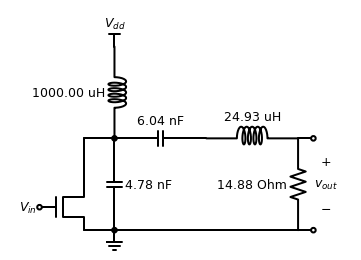

In [140]:
ClassECalc()

### Aanpassing aan een 50 Ohm coax-lijn

We kunnen het vorig ontwerp aan de hand van een transformator met wikkelverhouding 1.83 ook aanpassen aan een coax lijn van 50 Ohm.

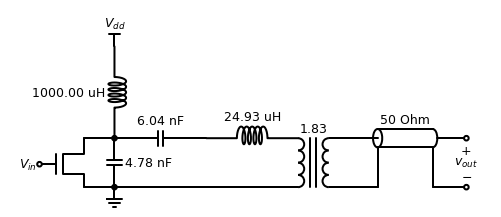

In [141]:
ClassECalc(TransformerCoax=True)

## Een 50W versterker of 137.77 kHz

In [181]:
ClassECalc(Q=5, Vcc=12.5, Vo=0.9, f=137777,L1=0.00027, P=50,verbose=True,plot=False)

RL = 1.39 Ohm
C₁ = 176.90 nF, wat overeenkomt met een complexe impedantie van 6.53 i Ohm
C₂ = 222.56 nF, wat overeenkomt met een complexe impedantie van -5.19 i Ohm
L₂ = 8.03 uH, wat overeenkomt met een complexe impedantie van 6.95 i Ohm
De totale complexe impedantie van de seriekring is 1.76 i Ohm
De maximale stroom uit de voeding is 4310.34 mA
De maximale source-drain spanning over de transistor (inclusief veiligheidsmarge 80 %) is 55.62 V
We kunnen de uitgang omwerken naar een impedantie van 50 Ohm door een transformator met wikkelverhouding: 6.00 


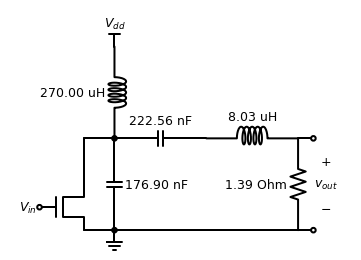

In [154]:
ClassECalc(Q=5, Vcc=12.5, Vo=0.9, f=137777,L1=0.00027, P=50)

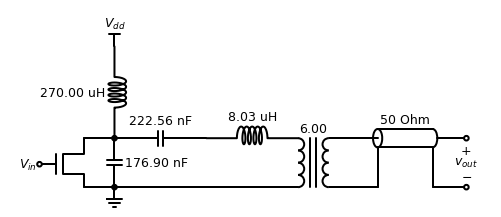

In [182]:
ClassECalc(Q=5, Vcc=12.5, Vo=0.9, f=137777,L1=0.00027, P=50,TransformerCoax=True)

In [183]:
spicelisting("simul\classE.sp")

* Class E amp 1
M_M1         2 1 0 0 FDB33N25
L_L1         2 3  270uH
C_C1         2 0  176.9nF
L_L2         4 5  8.03uH
C_C2         2 4  222.56nF
R_RL         5 0  1.39
V_Vdd        3 0 12.5V
V_Vin        1 0 PULSE(0 9 3.65u 20n 20n 3.65u 7.3u) DC=0
.model FDB33N25 VDMOS(Rg=3 Rd=40m Rs=27m Vto=5.35 Kp=35 lambda=.05 Cgdmax=1.1n Cgdmin=25p Cgs=1.7n Cjo=800p Is=7.94p Rb=7m mfg=Fairchild Vds=250 Ron=94m Qg=37n)



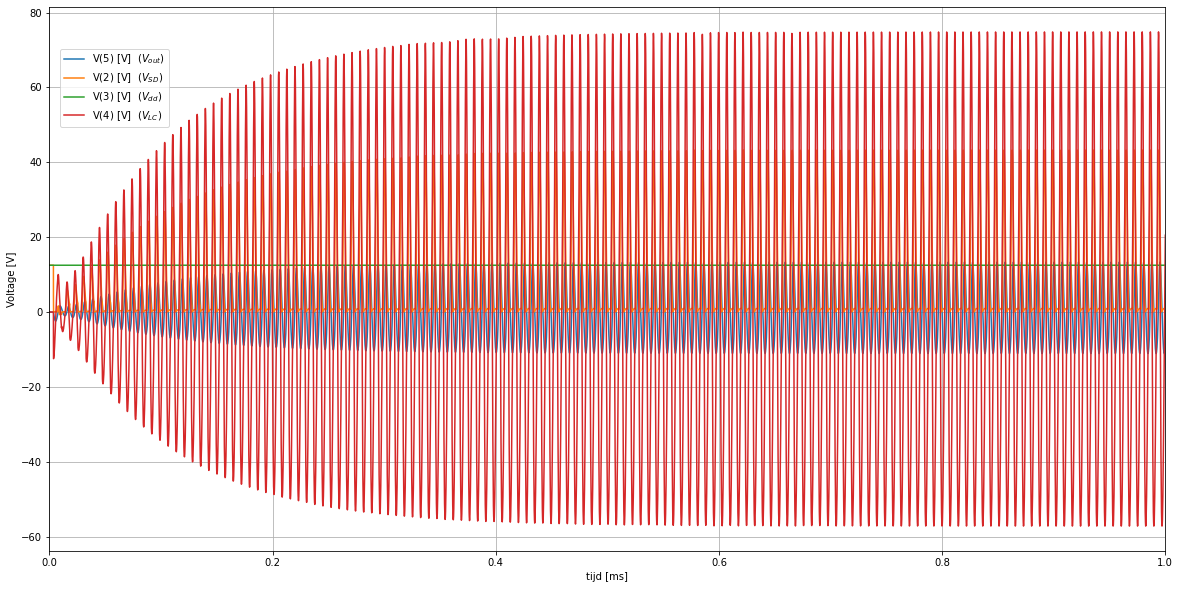

In [2]:
circuit=SpiceParser(path='simul\classE.sp').build_circuit()  
end_time=1e-3
simulator = circuit.simulator(temperature=25, nominal_temperature=25)
simulator.save_currents="I1(M_M1)"
analysis = simulator.transient(step_time=2e-7, end_time=end_time)

figure, ax = plt.subplots(figsize=(20, 10))
ax.plot(analysis.time*1e3,analysis.nodes['5'],label='V(5) [V]  ($V_{out}$)')
ax.plot(analysis.time*1e3,analysis.nodes['2'],label='V(2) [V]  ($V_{SD}$)' )
ax.plot(analysis.time*1e3,analysis.nodes['3'],label='V(3) [V]  ($V_{dd}$)' )
ax.plot(analysis.time*1e3,analysis.nodes['4'],label='V(4) [V]  ($V_{LC}$)' )
ax.legend( loc=(0.01,.78))
ax.grid()
ax.set_xlabel('tijd [ms]')
ax.set_xlim(0,end_time*1e3)
ax.set_ylabel('Voltage [V]')
plt.show()

### detail van de opstartsequentie

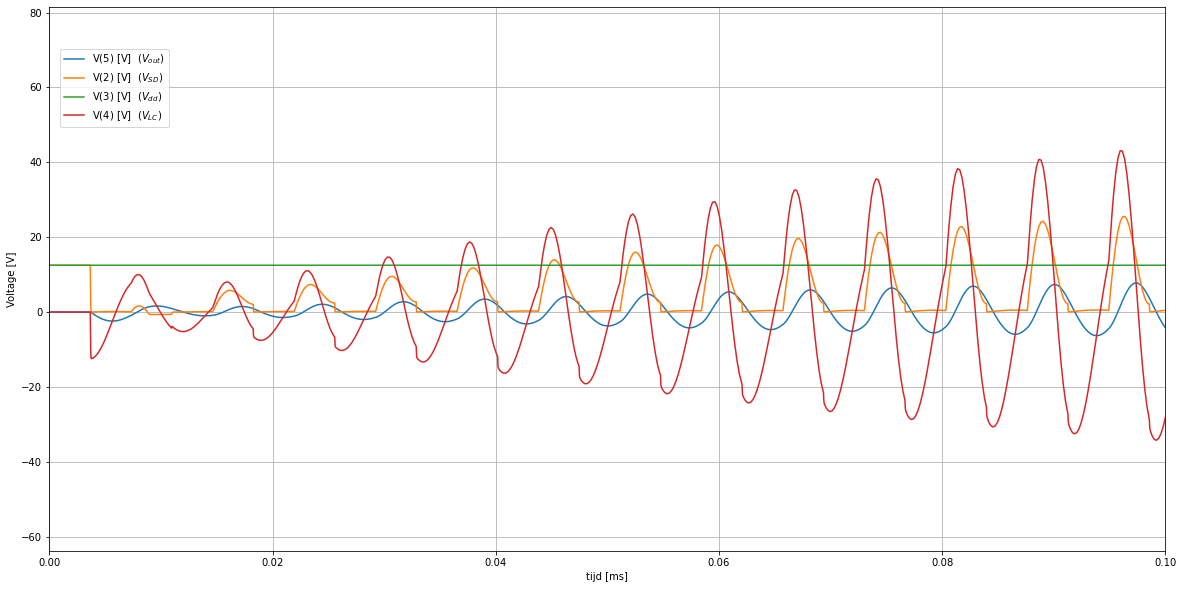

In [173]:
figure, ax = plt.subplots(figsize=(20, 10))
ax.plot(analysis.time*1e3,analysis.nodes['5'],label='V(5) [V]  ($V_{out}$)')
ax.plot(analysis.time*1e3,analysis.nodes['2'],label='V(2) [V]  ($V_{SD}$)' )
ax.plot(analysis.time*1e3,analysis.nodes['3'],label='V(3) [V]  ($V_{dd}$)' )
ax.plot(analysis.time*1e3,analysis.nodes['4'],label='V(4) [V]  ($V_{LC}$)' )
ax.legend( loc=(0.01,.78))
ax.grid()
ax.set_xlabel('tijd [ms]')
ax.set_xlim(0,end_time*1e2)
ax.set_ylabel('Voltage [V]')
plt.show()

### 1 periode van de Steady State

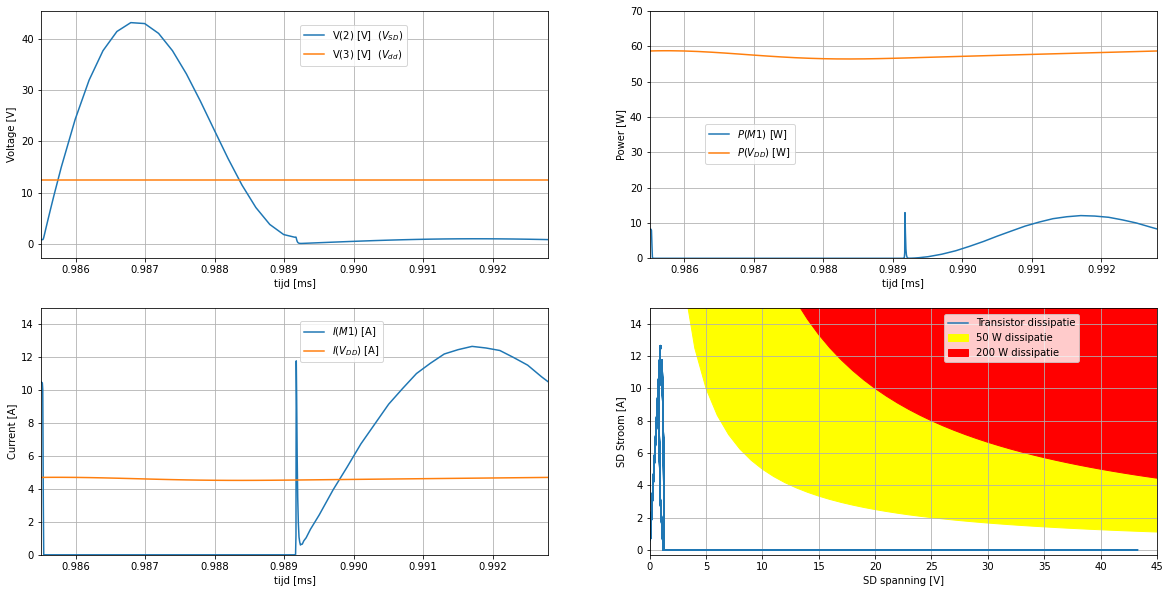

In [29]:
figure, ax = plt.subplots(2,2,figsize=(20, 10))
ax[0,0].plot(analysis.time*1e3,analysis.nodes['2'],label='V(2) [V]  ($V_{SD}$)' )
ax[0,0].plot(analysis.time*1e3,analysis.nodes['3'],label='V(3) [V]  ($V_{dd}$)' )
ax[0,0].legend( loc=(0.51,.78))
ax[0,0].grid()
ax[0,0].set_xlabel('tijd [ms]')
ax[0,0].set_xlim(end_time*135*7.3,end_time*136*7.3)
ax[0,0].set_ylabel('Voltage [V]')
ax[1,0].plot(analysis.time*1e3,analysis.internal_parameters['@m_m1[id]'],label='$I(M1)$ [A]' )
ax[1,0].plot(analysis.time*1e3,-analysis.branches['v_vdd'],label='$I(V_{DD})$ [A]' )
ax[1,0].legend( loc=(0.51,.78))
ax[1,0].grid()
ax[1,0].set_xlabel('tijd [ms]')
ax[1,0].set_xlim(end_time*135*7.3,end_time*136*7.3)
ax[1,0].set_ylim(0,15)
ax[1,0].set_ylabel('Current [A]');
ax[0,1].plot(analysis.time*1e3,analysis.internal_parameters['@m_m1[id]']*analysis.nodes['2'],label='$P(M1)$ [W]' )
ax[0,1].plot(analysis.time*1e3,-analysis.branches['v_vdd']*analysis.nodes['3'],label='$P(V_{DD})$ [W]' )
#ax[0,1].plot(analysis.time*1e3,analysis.branches['l_l2']*analysis.nodes['5'],label='$P_{out}$ [W]' )
ax[0,1].legend( loc=(0.11,.38))
ax[0,1].grid()
ax[0,1].set_xlabel('tijd [ms]')
ax[0,1].set_xlim(end_time*135*7.3,end_time*136*7.3)
ax[0,1].set_ylim(0,70)
ax[0,1].set_ylabel('Power [W]');
ax[1,1].plot(analysis.nodes['2'][9500:],analysis.internal_parameters['@m_m1[id]'][9500:],label='Transistor dissipatie' )
vref=np.arange(1,50,1)
ax[1,1].fill_between(vref,50/vref,200/vref,label='50 W dissipatie',color='yellow')
ax[1,1].fill_between(vref,200/vref,15+0*vref,label='200 W dissipatie',color='red')
ax[1,1].grid()
ax[1,1].legend( loc=(0.58,.78))
ax[1,1].set_xlabel('SD spanning [V]')
ax[1,1].set_xlim(0,45)
ax[1,1].set_ylim(-0.3,15)
ax[1,1].set_ylabel('SD Stroom [A]');

### 2 W aan 1MHz

In [51]:
ClassECalc(Q=2.5, Vcc=12.5, Vo=0.2, f=1000000,L1=27e-6, P=2, verbose=True, plot=False,TransformerCoax=False)

RL = 32.94 Ohm
C₁ = 1.63 nF, wat overeenkomt met een complexe impedantie van -97.84 i Ohm
C₂ = 4.71 nF, wat overeenkomt met een complexe impedantie van -33.82 i Ohm
L₂ = 13.11 uH, wat overeenkomt met een complexe impedantie van 82.36 i Ohm
De totale complexe impedantie van de seriekring is 48.54 i Ohm
De maximale stroom uit de voeding is 162.60 mA
De maximale source-drain spanning over de transistor (inclusief veiligheidsmarge 80 %) is 55.62 V
We kunnen de uitgang omwerken naar een impedantie van 50 Ohm door een transformator met wikkelverhouding: 1.23 


## Flat top

In 2013 werd het originele design uitgebreid door ook de derde harmonische weg te filteren <cite id="4ezyj"><a href="#zotero|1031761/UGXR92FN">[4]</a></cite>.


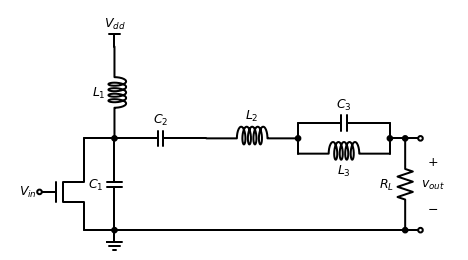

In [81]:
d = schem.Drawing()
d.add(e.VDD, label='$V_{dd}$')
L1 = d.add(e.INDUCTOR2, d='down', label='$L_1$')
d.add(e.DOT)
C2 = d.add(e.CAP, d='right', label='$C_2$')
L2 = d.add(e.INDUCTOR2, d='right', label='$L_2$')
d.add(e.DOT)
d.add(e.LINE,xy=L2.end, d='up',l=0.5)
C3 = d.add(e.CAP, d='right', label='$C_3$')
d.add(e.LINE, d='down',l=0.5)
d.add(e.DOT)
d.add(e.LINE,xy=L2.end, d='down',l=0.5)
L3 = d.add(e.INDUCTOR2, d='right', botlabel='$L_3$')
d.add(e.LINE, d='up',l=0.5)
d.add(e.LINE, d='right',l=0.5)
d.add(e.DOT)
R = d.add(e.RES, d='down', label='$R_L$')
d.add(e.DOT)
d.add(e.LINE, xy=R.start, d='right', l=0.5)
dot=d.add(e.DOT_OPEN)
d.add(e.LINE,xy=R.end, d='right',l=0.5)
d.add(e.DOT_OPEN)
d.add(e.LINE,xy=R.end, d='left', tox=C2.start)
d.add(e.DOT)
d.add(e.GAP_LABEL, d='down', xy= dot.start, toy= R.end, label=['+','$v_{out}$','$-$'],lblofst=0.4)
C1 = d.add(e.CAP, d='down',xy=L1.end,toy=R.end, label='$C_1$')
d.add(e.GND)
d.add(e.LINE, d='left', l=1)
d.add(e.LINE, d='up', l=0.5)
T = d.add(e.NFET, d='left', lftlabel='$V_{in}$')
d.add(e.LINE, d='up',toy=R.start)
d.add(e.LINE,tox=L1.end, d='right')
d.add(e.DOT_OPEN, xy=T.gate)
d.draw()

## Referenties

<!-- BIBLIOGRAPHY START -->
<div class="csl-bib-body">
  <div class="csl-entry"><i id="zotero|1031761/96BMKR88"></i>
    <div class="csl-left-margin">1.</div><div class="csl-right-inline">Sokal - 1998 - Class E high-efficiency power amplifiers, from HF .pdf. (n.d.).</div>
  </div>
  <div class="csl-entry"><i id="zotero|1031761/CXUZ8ZFG"></i>
    <div class="csl-left-margin">2.</div><div class="csl-right-inline">Nathan O. Sokal &#38; A. D. Sokal, Class E-A new class of high-efficiency tuned single-ended switching power amplifiers. <i>IEEE Journal of Solid-State Circuits</i>, <b>10</b> (1975) 168–176. https://doi.org/10.1109/JSSC.1975.1050582.</div>
  </div>
  <div class="csl-entry"><i id="zotero|1031761/G2K7PIUF"></i>
    <div class="csl-left-margin">3.</div><div class="csl-right-inline">Nathan O Sokal, Class-E RF Power Amplifiers. <i>QEX</i>, (2001) 9–20.</div>
  </div>
  <div class="csl-entry"><i id="zotero|1031761/UGXR92FN"></i>
    <div class="csl-left-margin">4.</div><div class="csl-right-inline">A. Mediano &#38; N. O. Sokal, A Class-E RF Power Amplifier With a Flat-Top Transistor-Voltage Waveform. <i>IEEE Transactions on Power Electronics</i>, <b>28</b> (2013) 5215–5221. https://doi.org/10.1109/TPEL.2013.2242097.</div>
  </div>
</div>
<!-- BIBLIOGRAPHY END -->

